<div style="text-align: center"><h2>Final Project INFO 6105 Data Sci Engineering Methods and Tools</h2></div>
<div style="text-align: center"><h2>By Prof. Dino Konstantopoulos </h2></div>
<br><br>

<h3 align="right"> Group 2 
    <br><br>Bhakti Bharat Desai 002701264 <br> Ishika Misal 002787945 <br> Vedant Deshpande 002770467 <br></h3>
    
-------
    

<center> 
<h1>OLYMPICS Data combined with GDP Data & Population Data</h1>
<img src = 'images/olympic_logo.jpeg' width=700>
</center>

-------------

This dataset, focuses on the Olympic Games, comprises statistics on the athletes, their countries, and events that occurred throughout every contemporary Olympics from 1896 until 2016. The set includes a variety of records which contain information about the demographic information of the athletes, tournament outcomes, and nation-specific statistics involving GDP and population.

To deliver a rich and comprehensive collection of information which could possibly utilized in data cleaning, data exploration, and model prediction, this dataset was developed. Identifying and resolving problems with data, like inaccurate or missing values, is referred to cleaning up data. To be able to discover insights and observe patterns in the data, data exploration involves examining and interpreting the data. Creating models which can predict / forecast occurrences, like predicting which nation will be awarded the most medals in forthcoming Olympic Games.

-------------



In [1]:
# start by importing pandas and numpy
import pandas as pd
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Importing Olympics Dataset

In [2]:
# Reading the athlete_events dataset
olympics = pd.read_csv('dataset/athlete_events.csv')
olympics.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


Lets verify whether the dataset "athlete_events" contains any null/empty values

In [3]:
#print the sum of missing values for each column
print(olympics.isnull().sum())

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64


The dataset "athlete_events" has many missing values in height, weight, age, and about 231,333 rows for medals due to non-winning athletes. Let's replace these missing values by 'Did not win' or 'DNW'



In [4]:
#replacing missing values with "DNW" in "model" column
olympics['Medal'].fillna('DNW', inplace = True)

In [5]:
#missing values have been resolved
print(olympics.isnull().sum())

ID            0
Name          0
Sex           0
Age        9474
Height    60171
Weight    62875
Team          0
NOC           0
Games         0
Year          0
Season        0
City          0
Sport         0
Event         0
Medal         0
dtype: int64


In [6]:
olympics.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,DNW
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,DNW
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,DNW
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,DNW


#### NOC - National Olympic Committee
To determine if all NOCs are associated with a distinct team, let's create a unique subset of the NOC and team columns and perform a value count. These NOCs are responsible for managing their country's participation in the Olympics.

In [7]:
#first filtered to select only 'NOC' & 'Team' columns, duplicates are removed,
# & the count of each NOC abbreviation is calculated and the top 5 are displayed
print(olympics.loc[:, ['NOC', 'Team']].drop_duplicates()['NOC'].value_counts().head())

FRA    160
USA     97
GBR     96
SWE     52
NOR     46
Name: NOC, dtype: int64


The dataset has revealed some unexpected information, where NOC code 'FRA' is linked with 160 teams. To correct this, a mapping between NOC codes and corresponding countries can be used, which is available in the 'NOC' dataset. The first five rows of the dataset are shown below.

In [8]:
#reading the noc-country mapping dataset
nocCountry = pd.read_csv('dataset/noc_regions.csv')

#dropping column 'notes' from the dataset
nocCountry.drop('notes', axis = 1 , inplace = True)

#renaming coulmn 'region' to 'Country'
nocCountry.rename(columns = {'region':'Country'}, inplace = True)

nocCountry.head()

,NOC,Country
0,AFG,Afghanistan
1,AHO,Curacao
2,ALB,Albania
3,ALG,Algeria
4,AND,Andorra


Merge the original dataset with the NOC master dataset using the NOC code as the primary key. 
Using a left join to retain all participating countries in the data, even if their NOC-Country is not found in the master. Missing entries can be corrected manually.

In [9]:
# merging (left join 'olympics' and 'nocCountry' on 'NOC')
olympicsMerge = olympics.merge(nocCountry,
                                left_on = 'NOC',
                                right_on = 'NOC',
                                how = 'left')

Even after merging, we have noticed that certain NOC codes in the Olympics dataset do not have any corresponding values in the NOC master dataset.

In [10]:
# Do we have Unmatched NOCs in Olympics dataset?
olympicsMerge.loc[olympicsMerge['Country'].isnull(),['NOC', 'Team']].drop_duplicates()

,NOC,Team
578,SGP,Singapore
6267,ROT,Refugee Olympic Athletes
44376,SGP,June Climene
61080,UNK,Unknown
64674,TUV,Tuvalu
80986,SGP,Rika II
108582,SGP,Singapore-2
235895,SGP,Singapore-1


By examining the 'Team' names, we can manually insert the correct country names into the Olympics dataset. 


For instance, we can replace 

1. SGP -> Singapore
2. ROT -> Refugee Olympic Athletes 
3. UNK -> Unknown
4. TUV -> Tuvalu

In [11]:
#Substitute absent Teams with preceding values

#olympicsMerge.loc[olympicsMerge['Country'].isnull(), ['Country']] = olympicsMerge['Team']

olympicsMerge['Country'] = np.where(olympicsMerge['NOC']=='SGP', 'Singapore', olympicsMerge['Country'])
olympicsMerge['Country'] = np.where(olympicsMerge['NOC']=='ROT', 'Refugee Olympic Athletes', olympicsMerge['Country'])
olympicsMerge['Country'] = np.where(olympicsMerge['NOC']=='UNK', 'Unknown', olympicsMerge['Country'])
olympicsMerge['Country'] = np.where(olympicsMerge['NOC']=='TUV', 'Tuvalu', olympicsMerge['Country'])

In [12]:
# dropping values from Country into Team
olympicsMerge.drop('Team', axis = 1, inplace = True)
olympicsMerge.rename(columns = {'Country': 'Team'}, inplace = True)

Upon further examination of the mapping between NOC and team, we have discovered that each one is linked to only one value. 

------

### Merging GDP data

To analyze the factors impacting a country's medal count, we must import GDP data categorized by country and year, containing country name, code, year, and GDP value. Unnecessary columns like Indicator Name and Indicator Code have been removed. See GDP data below -

In [13]:
# Reading the world_gdp dataset
wGDP = pd.read_csv('dataset/world_gdp.csv', skiprows = 3)

# Removing irrelevant columns
wGDP.drop(['Indicator Name', 'Indicator Code'], axis = 1, inplace = True)

In [14]:
# Combine GDP records from different years into a column for easier merging.
wGDP = pd.melt(wGDP, id_vars = ['Country Name', 'Country Code'], var_name = 'Year', value_name = 'GDP')

# convert 'year' column to numeric
wGDP['Year'] = pd.to_numeric(wGDP['Year'])

wGDP.head()

,Country Name,Country Code,Year,GDP
0,Afghanistan,AFG,1960,5.377778e+08
1,Albania,ALB,1960,NaN
2,Algeria,DZA,1960,2.723649e+09
3,American Samoa,ASM,1960,NaN
4,Andorra,AND,1960,NaN


Let's verify if the NOCs in the Olympic data correspond to those in the Country Code before merging.

In [15]:
#calculate number of countries represented in Olympics but not in wGDP.
len(list(set(olympicsMerge['NOC'].unique()) - set(wGDP['Country Code'].unique())))

108

In the Olympic dataset, there are 108 NOCs that do not have a corresponding entry in the GDP data country codes.  <br>
Would using the country name be a more effective method for combining the data?

In [16]:
#calculate number of teams represented in Olympics but not in wGDP.
len(list(set(olympicsMerge['Team'].unique()) - set(wGDP['Country Name'].unique())))

6

To match Olympic teams data with GDP data, we can assign a country code to each team and then merge the data using the country code. <br>This will result in having GDP data attached to the Olympic teams data.

In [17]:
# Merging to get country code
olympicsMergeCCode = olympicsMerge.merge(wGDP[['Country Name', 'Country Code']].drop_duplicates(),
                                            left_on = 'Team',
                                            right_on = 'Country Name',
                                            how = 'left')

olympicsMergeCCode.drop('Country Name', axis = 1, inplace = True)


In [18]:
# Merging to get gdp 
olympicsMergeGDP = olympicsMergeCCode.merge(wGDP,
                                                left_on = ['Country Code', 'Year'],
                                                right_on = ['Country Code', 'Year'],
                                                how = 'left')

olympicsMergeGDP.drop('Country Name', axis = 1, inplace = True)

-----

### Merging Population Data

When analyzing a country's progress, population plays a crucial role besides GDP. There are two perspectives on this matter:

1. Larger populations provide a wider range of talented individuals to select from, and

2. The amount of resources a country possesses is determined not only by GDP but also by GDP per capita.

The first five entries of the population data, including the Country, year, and population statistic, are presented below. The Indicator Code and Indicator Name have been excluded since they are deemed unnecessary.

In [19]:
# Reading the world_pop dataset (world population)
wPOP = pd.read_csv('dataset/world_pop.csv')

wPOP.head()

,Country,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,101220.0,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,...,26616792.0,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032
2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,...,20997687.0,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2970017.0,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,82683.0,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281


In [20]:
#dropping column 'Indicator Name' & 'Indicator Code' from the dataset
wPOP.drop(['Indicator Name', 'Indicator Code'], axis = 1, inplace = True)

#reshaping datafram
wPOP = pd.melt(wPOP, id_vars = ['Country', 'Country Code'], var_name = 'Year', value_name = 'Population')

# Changing Year to integer type
wPOP['Year'] = pd.to_numeric(wPOP['Year'])

wPOP.head()

,Country,Country Code,Year,Population
0,Aruba,ABW,1960,54211.0
1,Afghanistan,AFG,1960,8996351.0
2,Angola,AGO,1960,5643182.0
3,Albania,ALB,1960,1608800.0
4,Andorra,AND,1960,13411.0


By merging the data based on the Year and Country Code, we have obtained a comprehensive dataset that contains information on GDP and Population for each country. Below are some samples of rows from the dataset.

In [21]:
olympicsComplete = olympicsMergeGDP.merge(wPOP,
                                            left_on = ['Country Code', 'Year'],
                                            right_on= ['Country Code', 'Year'],
                                            how = 'left')

#dropping "Country" column from merged result
olympicsComplete.drop('Country', axis = 1, inplace = True)

olympicsComplete.head()

,ID,Name,Sex,Age,Height,Weight,NOC,Games,Year,Season,City,Sport,Event,Medal,Team,Country Code,GDP,Population
0,1,A Dijiang,M,24.0,180.0,80.0,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,DNW,China,CHN,4.269160e+11,1.164970e+09
1,2,A Lamusi,M,23.0,170.0,60.0,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,DNW,China,CHN,8.560550e+12,1.350695e+09
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,DNW,Denmark,DNK,NaN,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,DNK,NaN,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,DNW,Netherlands,NLD,2.585680e+11,1.476009e+07


The missing values in the dataset are due to countries not being included in the GDP and population masters, and limited availability of population and GDP data prior to 1961. To address this, we will only use data from 1961 onwards.

In [22]:
#print the sum of missing values for each column
olympicsComplete.isnull().sum()

ID                  0
Name                0
Sex                 0
Age              9474
Height          60171
Weight          62875
NOC                 0
Games               0
Year                0
Season              0
City                0
Sport               0
Event               0
Medal               0
Team                0
Country Code     1397
GDP             86925
Population      65120
dtype: int64

In [23]:
# considering data from 1961 and for summer olympics only
olympicsCompleteSubset = olympicsComplete.loc[(olympicsComplete['Year'] > 1960) & (olympicsComplete['Season'] == "Summer"), :]

# Reseting row indices
olympicsCompleteSubset = olympicsCompleteSubset.reset_index()

-----

### Exploratory Data Analysis

Who has the highest overall medal count in the Olympics? 

<img src = 'images/medals.png' width=400>

Creating a column indicating whether a medal was won, with 1 for Gold, Silver, or Bronze and 0 for no medal.

-----

In [24]:
olympicsCompleteSubset['Medal_Won'] = np.where(olympicsCompleteSubset.loc[:,'Medal'] == 'DNW', 0, 1)

To accurately determine the top-performing nations in the Olympics, we must consider that each row in the data represents an individual athlete's medal. 

Therefore, simply summing the 'Medal_Won' column would not provide an accurate medal tally for team events. 


To address this, we need to identify which events are team events. An event is considered a team event if a team wins more than one gold medal in that event during an Olympics.

In [25]:
# Checking number of medals won in a year for an event by a team
identifyTeamEvents = pd.pivot_table(olympicsCompleteSubset,
                                      index = ['Team', 'Year', 'Event'],
                                      columns = 'Medal',
                                      values = 'Medal_Won',
                                      aggfunc = 'sum',
                                     fill_value = 0).drop('DNW', axis = 1).reset_index()

identifyTeamEvents = identifyTeamEvents.loc[identifyTeamEvents['Gold'] > 1, :]

#saving unique sport event
teamSports = identifyTeamEvents['Event'].unique()

Some events are considered team events, but they are actually not team events because multiple athletes were awarded the gold medal due to having the same score or time. Some samples include -
1. Gymnastics Women's Balance Beam
2. Gymnastics Men's Horizontal Bar
3. Swimming Women's 100 metres Freestyle
4. Swimming Men's 50 metres Freestyle

After examining the events where multiple gold medals were given, it was discovered that they were actually individual events, but multiple athletes were awarded the gold medal due to having the same score or time. Therefore, these events should not be considered team sports and need to be removed from the list.

In [26]:
#removing individual events and updating team events
removeSports = ["Gymnastics Women's Balance Beam", "Gymnastics Men's Horizontal Bar", 
                 "Swimming Women's 100 metres Freestyle", "Swimming Men's 50 metres Freestyle"]

teamSports = list(set(teamSports) - set(removeSports))

We need to add a column to the dataset that distinguishes between team events and individual events. 

This will help us calculate the medal tally for each country accurately.

In [27]:
# if event name matches in team sports, then it is a team event. Others are singles events.
teamEventMask = olympicsCompleteSubset['Event'].map(lambda x: x in teamSports)
singleEventMask = [not i for i in teamEventMask]

# rows where medal_won is 1
medalMask = olympicsCompleteSubset['Medal_Won'] == 1

In [28]:
# adding 1 under team event -> if medal is won and event in team event list
olympicsCompleteSubset['Team_Event'] = np.where(teamEventMask & medalMask, 1, 0)

# adding 1 under singles event -> if medal is won and event not in team event list
olympicsCompleteSubset['Single_Event'] = np.where(singleEventMask & medalMask, 1, 0)

In [29]:
# Add an identifier for team/single event
olympicsCompleteSubset['Event_Category'] = olympicsCompleteSubset['Single_Event'] + \
olympicsCompleteSubset['Team_Event']

To calculate the medal tally independent of team size, we need to divide the number of medals won by the number of members in the winning team. 

In [30]:
#calculating agnostic and reseting index
medalTallyAgnostic = olympicsCompleteSubset.\
groupby(['Year', 'Team', 'Event', 'Medal'])[['Medal_Won', 'Event_Category']].\
agg('sum').reset_index()

#creating new column 'Medal_Won_Corrected'
medalTallyAgnostic['Medal_Won_Corrected'] = medalTallyAgnostic['Medal_Won']/medalTallyAgnostic['Event_Category']

With the corrected data, lets find the total medal tally of the top 4 countries from 1964 to 2016!

In [31]:
# MedalTally -> grouping & aggregating values
medalTally = medalTallyAgnostic.groupby(['Year','Team'])['Medal_Won_Corrected'].agg('sum').reset_index()

#creating pivot-table with grouped & aggregate values
medalTallyPivot = pd.pivot_table(medalTally,
                     index = 'Team',
                     columns = 'Year',
                     values = 'Medal_Won_Corrected',
                     aggfunc = 'sum',
                     margins = True).sort_values('All', ascending = False)[1:5]

# printing total medals won
medalTallyPivot.loc[:,'All']


Team
USA        1387.0
Russia     1298.0
Germany    1042.0
China       545.0
Name: All, dtype: float64


Let's check what is the year-by-year breakdown of medal tallies for the top four countries - from 1964 to 2016.
##### top countries : USA, Russia, Germany, and China

Text(0.5, 1.0, 'Olympic Performance Comparison')

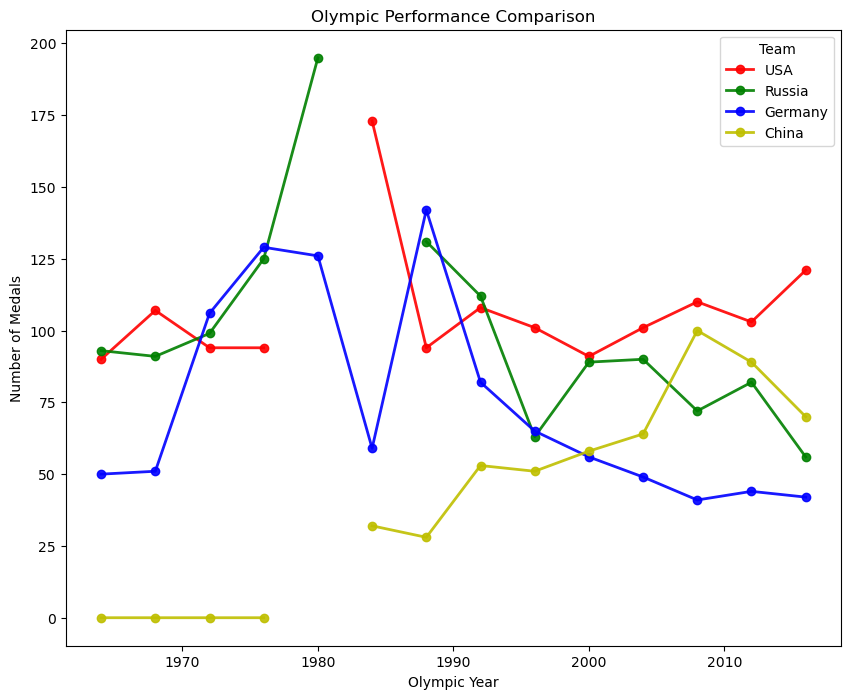

In [32]:
# List of top countries
topCountries = ['USA', 'Russia', 'Germany', 'China']

#creating pivot-table for top countries
yearTeamMedals = pd.pivot_table(medalTally,
                                  index = 'Year',
                                  columns = 'Team',
                                  values = 'Medal_Won_Corrected',
                                  aggfunc = 'sum')[topCountries]

# plotting modelTally 
yearTeamMedals.plot(linestyle = '-', marker = 'o', alpha = 0.9, figsize = (10,8), linewidth = 2, color = 'rgby')
xlabel('Olympic Year')
ylabel('Number of Medals')
title('Olympic Performance Comparison')

------

### Fascinating observation 1
The absence of data for the year 1980 in the USA and China columns is not an error. This is because during that year, the United States spearheaded a boycott of the Summer Olympic Games held in Moscow as a means of protesting the Soviet Union's invasion of Afghanistan in late 1979. As a result of the boycott, 65 countries declined to participate in the games, while 80 nations still sent athletes to compete, with India being among them.

### Fascinating observation 2
The absence of Russia in the 1984 Summer Olympics was not an error as it was a part of the boycott led by the Soviet Union, which involved 14 Eastern Bloc countries and their allies. This boycott came four years after the United States-led boycott of the 1980 Summer Olympics in Moscow, and was initiated on May 8, 1984.

### Fascinating observation 3
China's performance in the Olympics was not noteworthy until 1984, but it has exhibited exceptional results in the games since then.

------


Let's plot a breakdown of medal by its type - Gold, Silver, Bronze

Text(0, 0.5, 'Country')

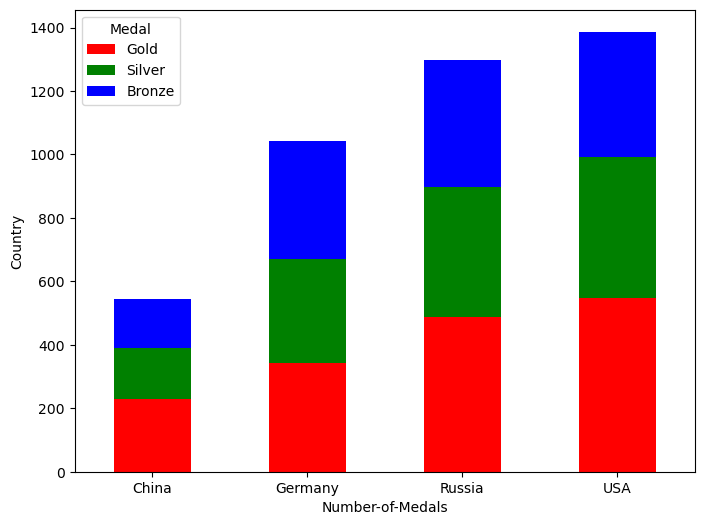

In [33]:
# List of top countries
topCountries = ['USA', 'Russia', 'Germany', 'China']

# masking row -> if countries match
rowMask2 = medalTallyAgnostic['Team'].map(lambda x: x in topCountries)

# pivot-table to calculate sum of all the medals for each country
medalTallySpecific = pd.pivot_table(medalTallyAgnostic[rowMask2],
                                     index = ['Team'],
                                     columns = 'Medal',
                                     values = 'Medal_Won_Corrected',
                                     aggfunc = 'sum',
                                     fill_value = 0).drop('DNW', axis = 1)

# interchaning columns so it appears in order of the chart.
medalTallySpecific = medalTallySpecific.loc[:, ['Gold', 'Silver', 'Bronze']]

#plotting a bar-graph
medalTallySpecific.plot(kind = 'bar', stacked = True, figsize = (8,6), rot = 0, color = 'rgb')
xlabel('Number-of-Medals')
ylabel('Country')

It is surprising that the ranking of countries corresponds to the number of gold medals they have won!!

-----

### In which sports do these countries excel?

So, Our goal is to identify the events in which a country has highest percentage of gold medals relative to its overall gold medal count throughout different years.

In [34]:
# pivot-table to aggregate medal_tally_agnostic to determine sports & team
bestTeamSports = pd.pivot_table(medalTallyAgnostic[rowMask2],
                                  index = ['Team', 'Event'],
                                  columns = 'Medal',
                                  values = 'Medal_Won_Corrected',
                                  aggfunc = 'sum',
                                  fill_value = 0).sort_values(['Team', 'Gold'], ascending = [True, False]).reset_index()

#dropping columns
bestTeamSports.drop(['Bronze', 'Silver', 'DNW'], axis = 1, inplace = True)

In [35]:
# considering column : team, event & Gold_Medal_Count & grouping w.r.t team
bestTeamSports.columns = ['Team', 'Event', 'Gold_Medal_Count']

bestTeamSports.groupby('Team').head(5)

,Team,Event,Gold_Medal_Count
0,China,Diving Women's Springboard,8
1,China,Table Tennis Women's Singles,8
2,China,Diving Women's Platform,7
3,China,Weightlifting Men's Lightweight,6
4,China,Badminton Women's Doubles,5
343,Germany,"Equestrianism Mixed Dressage, Team",11
344,Germany,"Canoeing Women's Kayak Doubles, 500 metres",7
345,Germany,Rowing Men's Quadruple Sculls,7
346,Germany,Rowing Women's Quadruple Sculls,6
347,Germany,Athletics Men's Discus Throw,5


It can be observed that the Chinese dominate in diving for both men and women, equestrian sports are a strong suit for the Germans, wrestling is favored by the Russians, and the Americans tend to excel in swimming.

-----

### The number of athletes that these countries send to the Olympics.

What information can we gather about the Olympic contingents of different countries, specifically regarding:

1. The overall size of each country's contingent being sent to the Olympics
2. The gender composition of each country's team, including the proportion of male and female athletes.

In [36]:
#For each year, extract the team, athlete name, and gender information, 
# and discarding duplicate entries where same athlete is participating in multiple sports.

# masking row with top 4 countries
rowMask3 = olympicsCompleteSubset['Team'].map(lambda x: x in topCountries)

yearTeamGender = olympicsCompleteSubset.loc[rowMask3, ['Year','Team', 'Name', 'Sex']].drop_duplicates()

In [37]:
# pivot-table -> count gender wise representation of teams in each year
yearTeamGenderCount = pd.pivot_table(yearTeamGender,
                                        index = ['Year', 'Team'],
                                        columns = 'Sex',
                                        aggfunc = 'count').reset_index()


In [38]:
# renaming column names at 0 level
yearTeamGenderCount.columns = yearTeamGenderCount.columns.get_level_values(0)

# renaming column appropriately
yearTeamGenderCount.columns = ['Year', 'Team', 'Female_Athletes', 'Male_Athletes']


In [39]:
# extracting total athletes per team-year
yearTeamGenderCount['Total_Athletes'] = yearTeamGenderCount['Female_Athletes'] + \
yearTeamGenderCount['Male_Athletes']

In [40]:
# isolating country wise dataset
#China
chinaData = yearTeamGenderCount[yearTeamGenderCount['Team'] == "China"]
chinaData.fillna(0, inplace = True)
chinaData.set_index('Year', inplace = True)


C:\Users\bhakt\AppData\Local\Temp\ipykernel_256\415286884.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chinaData.fillna(0, inplace = True)


In [41]:
#Germany
germanyData = yearTeamGenderCount[yearTeamGenderCount['Team'] == "Germany"]
germanyData.set_index('Year', inplace = True)


In [42]:
#Russia
russiaData = yearTeamGenderCount[yearTeamGenderCount['Team'] == "Russia"]
russiaData.set_index('Year', inplace = True)


In [43]:
#USA
usaData = yearTeamGenderCount[yearTeamGenderCount['Team'] == "USA"]
usaData.set_index('Year', inplace = True)

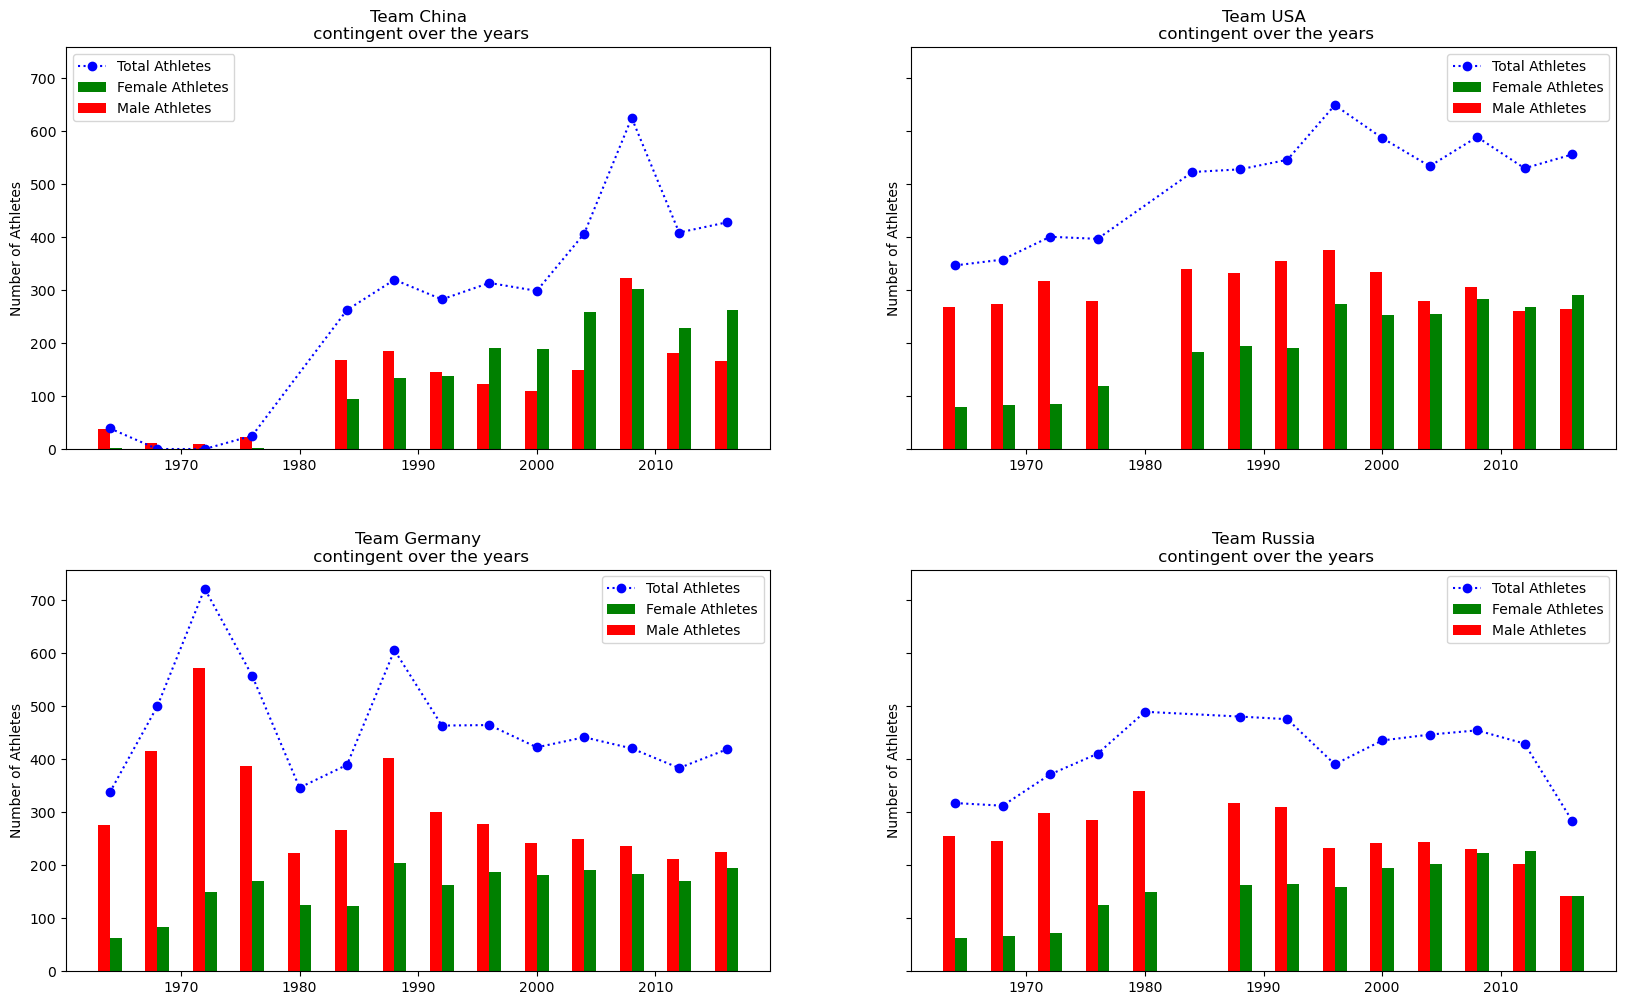

In [44]:
# Plot bar & line charts for male, female, and total athletes.
fig, ((ax1, ax2), (ax3, ax4)) = subplots(nrows = 2, ncols = 2, figsize = (20, 12), sharey = True)
fig.subplots_adjust(hspace = 0.3)

# Plot team China's batch size
ax1.bar(chinaData.index.values, chinaData['Female_Athletes'], width = 1, align = 'edge', label = 'Female Athletes', color = 'green')
ax1.bar(chinaData.index.values, chinaData['Male_Athletes'], width = -1, align = 'edge', label = 'Male Athletes', color = 'red')
ax1.plot(chinaData.index.values, chinaData['Total_Athletes'], linestyle = ':', color = 'blue', label = 'Total Athletes',
        marker = 'o')
ax1.set_title('Team China\n contingent over the years')
ax1.set_ylabel('Number of Athletes')
ax1.legend(loc = 'best')

# Plot team USA's batch size
ax2.bar(usaData.index.values, usaData['Female_Athletes'], width = 1, align = 'edge', label = 'Female Athletes', color = 'green')
ax2.bar(usaData.index.values, usaData['Male_Athletes'], width = -1, align = 'edge', label = 'Male Athletes', color = 'red')
ax2.plot(usaData.index.values, usaData['Total_Athletes'], linestyle = ':', color = 'blue', label = 'Total Athletes',
        marker = 'o')
ax2.set_title('Team USA\n contingent over the years')
ax2.set_ylabel('Number of Athletes')
ax2.legend(loc = 'best')

# Plot team Germany's batch size
ax3.bar(germanyData.index.values, germanyData['Female_Athletes'], width = 1, align = 'edge', label = 'Female Athletes', color = 'green')
ax3.bar(germanyData.index.values, germanyData['Male_Athletes'], width = -1, align = 'edge', label = 'Male Athletes', color = 'red')
ax3.plot(germanyData.index.values, germanyData['Total_Athletes'], linestyle = ':', color = 'blue', label = 'Total Athletes', 
         marker = 'o')
ax3.set_title('Team Germany\n contingent over the years')
ax3.set_ylabel('Number of Athletes')
ax3.legend(loc = 'best')

# Plot team Russia's batch size

ax4.bar(russiaData.index.values, russiaData['Female_Athletes'], width = 1, align = 'edge', label = 'Female Athletes', color = 'green')
ax4.bar(russiaData.index.values, russiaData['Male_Athletes'], width = -1, align = 'edge', label = 'Male Athletes', color = 'red')
ax4.plot(russiaData.index.values, russiaData['Total_Athletes'], linestyle = ':', color = 'blue', label = 'Total Athletes',
        marker = 'o')
ax4.set_title('Team Russia\n contingent over the years')
ax4.set_ylabel('Number of Athletes')
ax4.legend(loc = 'best')

show()

------
### Does the size of contingent relate with the number of medals?

Let's plot a graph that displays the correlation between the number of medals a team has won in past Olympics and the size of their contingent in those years.

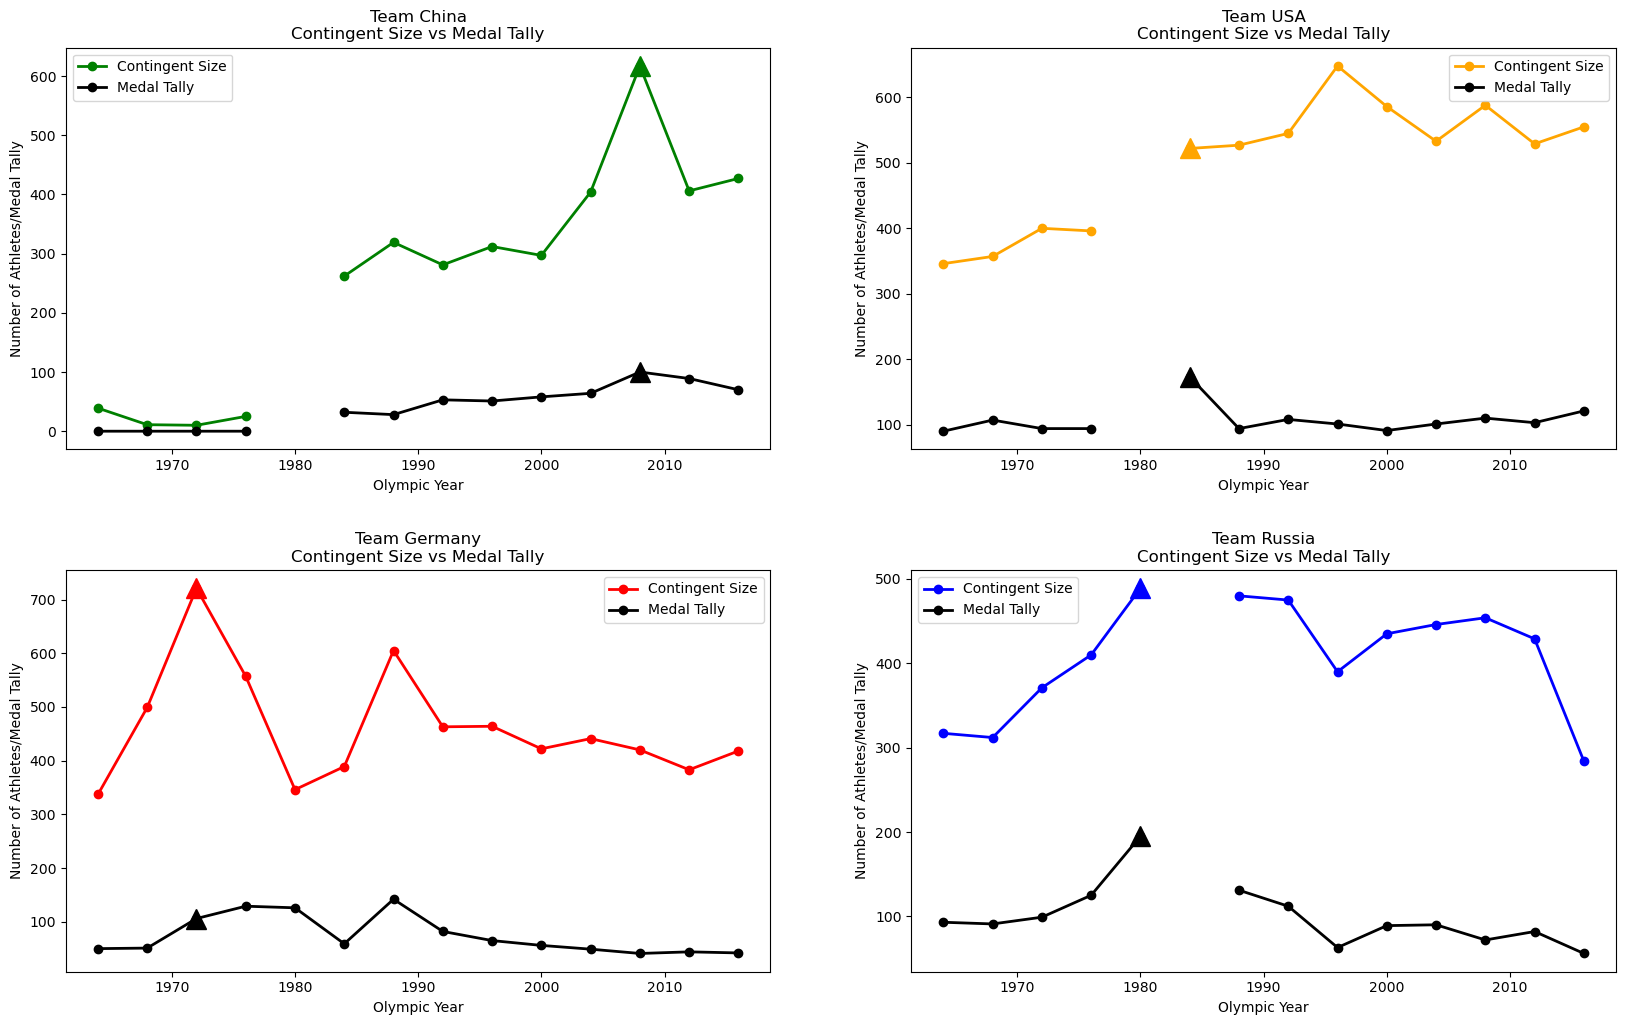

In [45]:
# Get year-wise & team-wise athletes.
yearTeamAthelete = olympicsCompleteSubset.loc[rowMask3, ['Year','Team', 'Name']].drop_duplicates()

# summing to get total contingent size.
contingentSize = pd.pivot_table(yearTeamAthelete,
                                 index = 'Year',
                                 columns = 'Team',
                                 values = 'Name',
                                 aggfunc = 'count')

fig, ((ax1, ax2), (ax3, ax4)) = subplots(nrows = 2,
                                         ncols = 2,
                                        figsize = (20,12))

fig.subplots_adjust(hspace = 0.3)

# Plot australia's medal tally and contingent size
contingentSize['China'].plot(ax = ax1, linestyle = '-', marker = 'o', linewidth = 2, color = 'green', 
                                  label = 'Contingent Size')
yearTeamMedals['China'].plot(ax = ax1, linestyle = '-', marker = 'o', linewidth = 2, color = 'black',
                                  label = 'Medal Tally')
ax1.plot(2008, contingentSize.loc[2008, 'China'], marker = '^', color = 'green', ms = 14)
ax1.plot(2008, yearTeamMedals.loc[2008, 'China'], marker = '^', color = 'black', ms = 14)
ax1.set_xlabel('Olympic Year')
ax1.set_ylabel('Number of Athletes/Medal Tally')
ax1.set_title('Team China\nContingent Size vs Medal Tally')
ax1.legend(loc = 'best')

# Plot USA's medal tally and contingent size
contingentSize['USA'].plot(ax = ax2, linestyle = '-', marker = 'o', linewidth = 2, color = 'orange',
                           label = 'Contingent Size')
yearTeamMedals['USA'].plot(ax = ax2, linestyle = '-', marker = 'o', linewidth = 2, color = 'black',
                            label = 'Medal Tally')
ax2.plot(1984, contingentSize.loc[1984, 'USA'], marker = '^', color = 'orange', ms = 14)
ax2.plot(1984, yearTeamMedals.loc[1984, 'USA'], marker = '^', color = 'black', ms = 14)
ax2.set_xlabel('Olympic Year')
ax2.set_ylabel('Number of Athletes/Medal Tally')
ax2.set_title('Team USA\nContingent Size vs Medal Tally')
ax2.legend(loc = 'best')

# Plot Germany's medal tally and contingent size
contingentSize['Germany'].plot(ax = ax3, linestyle = '-', marker = 'o', linewidth = 2, color = 'red',
                               label = 'Contingent Size')
yearTeamMedals['Germany'].plot(ax = ax3, linestyle = '-', marker = 'o', linewidth = 2, color = 'black',
                                label = 'Medal Tally')
ax3.plot(1972, contingentSize.loc[1972, 'Germany'], marker = '^', color = 'red', ms = 14)
ax3.plot(1972, yearTeamMedals.loc[1972, 'Germany'], marker = '^', color = 'black', ms = 14)
ax3.set_xlabel('Olympic Year')
ax3.set_ylabel('Number of Athletes/Medal Tally')
ax3.set_title('Team Germany\nContingent Size vs Medal Tally')
ax3.legend(loc = 'best')

# Plot Russia's medal tally and contingent size
contingentSize['Russia'].plot(ax = ax4, linestyle = '-', marker = 'o', linewidth = 2, color = 'blue',
                              label = 'Contingent Size')
yearTeamMedals['Russia'].plot(ax = ax4, linestyle = '-', marker = 'o', linewidth = 2, color = 'black',
                               label = 'Medal Tally')
ax4.plot(1980, contingentSize.loc[1980, 'Russia'], marker = '^', color = 'blue', ms = 14)
ax4.plot(1980, yearTeamMedals.loc[1980, 'Russia'], marker = '^', color = 'black', ms = 14)
ax4.set_xlabel('Olympic Year')
ax4.set_ylabel('Number of Athletes/Medal Tally')
ax4.set_title('Team Russia\nContingent Size vs Medal Tally')
ax4.legend(loc = 'best')

show()

It is noteworthy that in each of the mentioned countries, the highest number of athletes participating in the Olympics corresponds to the highest number of medals won, as indicated by the large triangles on the plots.

To obtain a more comprehensive understanding of the correlation between contingent size and medal tally, we will calculate the correlation coefficient for all teams rather than just the top 4, thus increasing the amount of data available.

In [46]:
# merging contingent size and medals won
yearTeamMedalsUnstack = yearTeamMedals.unstack().reset_index()
yearTeamMedalsUnstack.columns = ['Team','Year', 'Medal_Count']

contingentSizeUnstack = contingentSize.unstack().reset_index()

contingentSizeUnstack.columns = ['Team','Year', 'Contingent']

contingentMedals = contingentSizeUnstack.merge(yearTeamMedalsUnstack,
                                                 left_on = ['Team', 'Year'],
                                                 right_on = ['Team', 'Year'])

contingentMedals[['Contingent', 'Medal_Count']].corr()

,Contingent,Medal_Count
Contingent,1.000000,0.703625
Medal_Count,0.703625,1.000000


The correlation matrix presented above validates the observations made from the plots, showing a significant positive correlation (0.703) between the size of a country's contingent and its medal tally at the Olympics.

Notably, our analysis below reveals that the edition of the Olympics with the highest number of participants from these countries coincides with the edition held in their respective home countries.

-----

### Do these countries share any similarities or common traits?

Is there a particular sport or sports in which these countries excel? The table displays the frequency with which each sport appears in the top 5 rankings of these countries. A sport that appears in the top 5 for multiple countries can be considered a shared strength or commonality among them

In [47]:
# combining best team sports with olympics data to get sport for each event
teamCommonalities = bestTeamSports.merge(olympicsCompleteSubset.loc[:,['Sport', 'Event']].drop_duplicates(),
                                           left_on = 'Event',
                                           right_on = 'Event')

teamCommonalities = teamCommonalities.sort_values(['Team', 'Gold_Medal_Count'], ascending = [True, False])
teamCommonalities = teamCommonalities.groupby('Team').head(5).reset_index()


In [48]:
# pivot-table of the commonalities.
pd.pivot_table(teamCommonalities,
              index = 'Sport',
              columns = 'Team',
              values = 'Event',
              aggfunc = 'count',
              fill_value = 0,
              margins = True).sort_values('All', ascending = False)[1:]

Team,China,Germany,Russia,USA,All
Sport,,,,,
Athletics,0,1,0,2,3
Diving,2,0,0,0,2
Rowing,0,2,0,0,2
Swimming,0,0,0,2,2
Wrestling,0,0,2,0,2
Badminton,1,0,0,0,1
Basketball,0,0,0,1,1
Canoeing,0,1,0,0,1
Equestrianism,0,1,0,0,1


These countries have very little in common, which could be the reason for their success at the Olympics. Each country competes and excels in its own specialized area, which sets them apart from one another.

-----
### Is there a home advantage for teams in the Olympics?

To ensure a fair comparison, we will examine the performance of these teams during the year in which the Olympics were hosted in their home country, as well as in the preceding and subsequent editions. This is because a home advantage in the Olympics refers to the phenomenon where a team performs better when competing on their home turf compared to when competing in other countries.

Where was the olympics held in each of the years under consideration?

In [49]:
#removing duplicatesand sorting remaining rows in asc order of year
olympicsCompleteSubset[['Year', 'City']].drop_duplicates().sort_values('Year')

,Year,City
74,1964,Tokyo
11,1968,Mexico City
12,1972,Munich
37,1976,Montreal
70,1980,Moskva
10,1984,Los Angeles
13,1988,Seoul
0,1992,Barcelona
3,1996,Atlanta
2,2000,Sydney


Upon reviewing the data, it is evident that some city names have been recorded incorrectly. 

1. 'Moskva' should be corrected to 'Moscow'
2. 'Athina' should be corrected to 'Athens'

We need to rectify these city names before proceeding with any further analysis.

In [50]:
# Correcting city names in the dataset
olympicsCompleteSubset['City'].replace(['Athina', 'Moskva'], ['Athens', 'Moscow'], inplace = True)

Having corrected the city names, next step is to map each of these cities to their respective countries.

In [51]:
# mapping dictionary -> city to country
cityToCountry = {'Tokyo': 'Japan',
                  'Mexico City': 'Mexico',
                  'Munich': 'Germany',
                  'Montreal': 'Canada',
                  'Moscow': 'Russia',
                  'Los Angeles': 'USA',
                  'Seoul': 'South Korea',
                  'Barcelona': 'Spain',
                  'Atlanta': 'USA',
                  'Sydney': 'Australia',
                  'Athens': 'Greece',
                  'Beijing': 'China',
                  'London': 'UK',
                  'Rio de Janeiro': 'Brazil'}


In [52]:
# Map cities to countries
olympicsCompleteSubset['Country_Host'] = olympicsCompleteSubset['City'].map(cityToCountry)

#print the mapped information
olympicsCompleteSubset.loc[:, ['Year', 'Country_Host']].drop_duplicates().sort_values('Year')

,Year,Country_Host
74,1964,Japan
11,1968,Mexico
12,1972,Germany
37,1976,Canada
70,1980,Russia
10,1984,USA
13,1988,South Korea
0,1992,Spain
3,1996,USA
2,2000,Australia


Remarkably, each of the top countries considered in our analysis has hosted the Olympics at least once during the same time period. However, there is one issue: Russia hosted the Olympics during a year when the USA did not participate. Since Russia and the USA were the top contenders for medals during this period, it is likely that Russia won more medals than they would have if the USA had been present. To address this issue, we need to control for this factor.

To calculate the home advantage, we will create a table that lists the host country for each year, the participating nations, and their respective medal tallies. We will then compare the performance of each country during the edition hosted in their home country to their performance in the preceding and subsequent editions.

In [53]:
# extracting -> year,host-nation and team-name from dataset
yearHostTeam = olympicsCompleteSubset[['Year', 'Country_Host', 'Team']].drop_duplicates()

# checking rows -> host-country is same as team
rowMask4 = (yearHostTeam['Country_Host'] == yearHostTeam['Team'])

# adding years in yearHostTeam to capture one previous year & one later year
yearHostTeam['Prev_Year'] = yearHostTeam['Year'] - 4
yearHostTeam['Next_Year'] = yearHostTeam['Year'] + 4

# Subset => only if host-nation & team same
yearHostTeam = yearHostTeam[rowMask4]

In [54]:
# Calculating medals won in each year where a team played at home & merge yearHostTeam with medalTally on year & team
yearHostTeamMedal = yearHostTeam.merge(medalTally,
                                           left_on = ['Year', 'Team'],
                                           right_on = ['Year', 'Team'],
                                           how = 'left')
#renaming the column
yearHostTeamMedal.rename(columns = {'Medal_Won_Corrected' : 'Medal_Won_Host_Year'}, inplace = True)

# Calculating medals won by team in previous year they hosted
yearHostTeamMedal = yearHostTeamMedal.merge(medalTally,
                                                 left_on = ['Prev_Year', 'Team'],
                                                 right_on = ['Year', 'Team'],
                                                 how = 'left')

yearHostTeamMedal.drop('Year_y', axis = 1, inplace = True)
yearHostTeamMedal.rename(columns = {'Medal_Won_Corrected': 'Medal_Won_Prev_Year',
                                      'Year_x':'Year'}, inplace = True)

# Calculating medals won by team the year after they hosted
yearHostTeamMedal = yearHostTeamMedal.merge(medalTally,
                                                 left_on = ['Next_Year', 'Team'],
                                                 right_on = ['Year', 'Team'],
                                                 how = 'left')

yearHostTeamMedal.drop('Year_y', axis = 1, inplace = True)
yearHostTeamMedal.rename(columns = {'Year_x': 'Year',
                                      'Medal_Won_Corrected' : 'Medal_Won_Next_Year'}, inplace = True)


# formatting general column changes
yearHostTeamMedal.drop(['Prev_Year', 'Next_Year'], axis = 1, inplace = True)
yearHostTeamMedal.sort_values('Year', ascending = True, inplace = True)
yearHostTeamMedal.reset_index(inplace = True, drop = True)

# reordering columns
yearHostTeamMedal = yearHostTeamMedal.loc[:, ['Year', 'Country_Host', 'Team', 'Medal_Won_Prev_Year', 'Medal_Won_Host_Year', 'Medal_Won_Next_Year']]

yearHostTeamMedal

,Year,Country_Host,Team,Medal_Won_Prev_Year,Medal_Won_Host_Year,Medal_Won_Next_Year
0,1964,Japan,Japan,NaN,29.0,25.0
1,1968,Mexico,Mexico,1.0,9.0,1.0
2,1972,Germany,Germany,51.0,106.0,129.0
3,1976,Canada,Canada,5.0,11.0,NaN
4,1980,Russia,Russia,125.0,195.0,NaN
5,1984,USA,USA,NaN,173.0,94.0
6,1988,South Korea,South Korea,19.0,33.0,28.0
7,1992,Spain,Spain,4.0,22.0,17.0
8,1996,USA,USA,108.0,101.0,91.0
9,2000,Australia,Australia,41.0,58.0,50.0


If we disregard the Olympics where Russia (1980) and USA (1984) participated without their strongest competitors, it appears that teams tend to perform better when competing on their home turf.

-----

### Is there a correlation between a country's GDP and its performance in medal rankings?

A country's GDP serves as an indicator of its available resources. A higher GDP implies a greater capacity to allocate resources towards sports!

In [55]:
#combining medalTally with gdp based on year & team column using left join
yearTeamGDP = olympicsCompleteSubset.loc[:, ['Year', 'Team', 'GDP']].drop_duplicates()

medalTallyGDP = medalTally.merge(yearTeamGDP,
                                   left_on = ['Year', 'Team'],
                                   right_on = ['Year', 'Team'],
                                   how = 'left')


In [56]:
#mask row -> atleast 1medal won
rowMask5 = medalTallyGDP['Medal_Won_Corrected'] > 0

#mask row -> country is among the top countries
rowMask6 = medalTallyGDP['Team'].map(lambda x: x in topCountries)


Text(7101223999999.844, 145.0, 'Correlation = 0.6229032997622935')

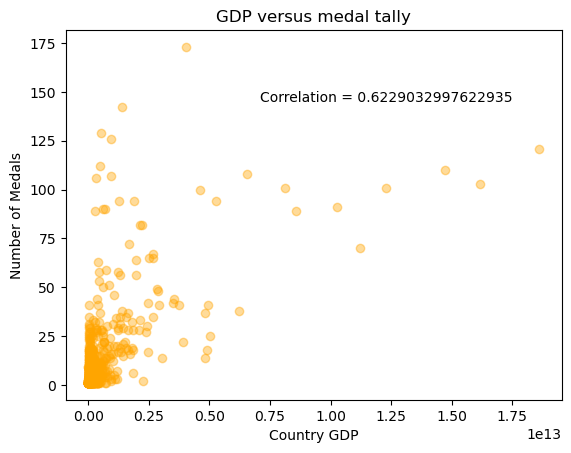

In [82]:
# plotting GDP vs medal tally to display correlation.
correlation = medalTallyGDP.loc[rowMask5, ['GDP', 'Medal_Won_Corrected']].corr()['Medal_Won_Corrected'][0]

plot(medalTallyGDP.loc[rowMask5, 'GDP'], 
     medalTallyGDP.loc[rowMask5, 'Medal_Won_Corrected'] , 
     linestyle = 'none', 
     color = 'orange',
     marker = 'o',
    alpha = 0.4)
xlabel('Country GDP')
ylabel('Number of Medals')
title('GDP versus medal tally')
text(np.nanpercentile(medalTallyGDP['GDP'], 99.6), 
     max(medalTallyGDP['Medal_Won_Corrected']) - 50,
     "Correlation = " + str(correlation))

The correlation of 0.622 between GDP and medals won displayed in the plot is statistically significant, suggesting that a higher GDP has a positive effect on a team's medal tally in the Olympics.

------
### Which athletes have the highest achievements in their respective sports?

For the purpose of this analysis, accomplished athletes are defined as those with a high ratio of medals to participation, which measures the average number of medals won per event participated in.

In [58]:
# Creating athlete dataframe with sport, medals won.
athSportMedal = olympicsCompleteSubset.groupby(['Team','Name', 'Sport'])['Medal_Won'].agg('sum').reset_index()
athSportMedal.sort_values(['Sport', 'Medal_Won'], ascending = [True, False], inplace = True)

# keeping athletes who won medals
medalMask = athSportMedal['Medal_Won'] > 0
athSportMedal = athSportMedal[medalMask]

athSportMedal.head()

,Team,Name,Sport,Medal_Won
66110,South Korea,Kim Su-Nyeong,Archery,6
65767,South Korea,Ki Bo-Bae,Archery,4
66718,South Korea,Park Seong-Hyeon,Archery,4
16642,China,Zhang Juanjuan,Archery,3
39055,Italy,Marco Galiazzo,Archery,3


In [59]:
#calculating number of participations of each athlete - sport wise.
athSportAppearance = olympicsCompleteSubset.groupby(['Team', 'Name', 'Sport'])['NOC'].agg('count').reset_index()

athSportAppearance.rename(columns = {'NOC': 'Event_Count'}, inplace = True)

athSportAppearance.head()


,Team,Name,Sport,Event_Count
0,Afghanistan,Abdul Baser Wasiqi,Athletics,1
1,Afghanistan,Abdul Ghafoor,Athletics,1
2,Afghanistan,Abdul Wahab Zahiri,Athletics,1
3,Afghanistan,Ahmad Djan,Wrestling,2
4,Afghanistan,Ahmad Nasir,Wrestling,1


In [60]:
# athMedalAppearance -> merging athSportMedal & athSportAppearance
athMedalAppearance = athSportMedal.merge(athSportAppearance,
                                            left_on = ["Team", "Name", "Sport"],
                                            right_on = ['Team', 'Name', 'Sport'],
                                            how = "left")


In [61]:
# Calculating medals per participation
athMedalAppearance['Medal_Per_Participation'] = athMedalAppearance['Medal_Won']/athMedalAppearance['Event_Count']

athMedalAppearance.sort_values(['Medal_Per_Participation', 'Medal_Won'], ascending = [False, False], inplace = True)

athMedalAppearance.head(10)

,Team,Name,Sport,Medal_Won,Event_Count,Medal_Per_Participation
12179,USA,Natalie Anne Coughlin (-Hall),Swimming,12,12,1.0
150,USA,"Frederick Carlton ""Carl"" Lewis",Athletics,10,10,1.0
4925,Germany,Isabelle Regina Werth,Equestrianism,10,10,1.0
12184,USA,"Gary Wayne Hall, Jr.",Swimming,10,10,1.0
5296,Italy,Maria Valentina Vezzali,Fencing,9,9,1.0
12191,Germany,"Kornelia Ender (-Matthes, -Grummt)",Swimming,8,8,1.0
12195,USA,"Donald Arthur ""Don"" Schollander",Swimming,8,8,1.0
12197,USA,Nathan Ghar-Jun Adrian,Swimming,8,8,1.0
4191,UK,Jason Francis Kenny,Cycling,7,7,1.0
4745,China,Wu Minxia,Diving,7,7,1.0


Many athletes have fewer than 10 medals but a high medal-to-participation ratio. To focus on athletes with greater experience, Let's filter the dataframe to only include those with more than 10 medals.

In [62]:
# filtering athletes with less than 10 total medals.
athMedalAppearance = athMedalAppearance[athMedalAppearance['Medal_Won'] >= 10]

athMedalAppearance

,Team,Name,Sport,Medal_Won,Event_Count,Medal_Per_Participation
12179,USA,Natalie Anne Coughlin (-Hall),Swimming,12,12,1.000000
150,USA,"Frederick Carlton ""Carl"" Lewis",Athletics,10,10,1.000000
4925,Germany,Isabelle Regina Werth,Equestrianism,10,10,1.000000
12184,USA,"Gary Wayne Hall, Jr.",Swimming,10,10,1.000000
12176,USA,"Michael Fred Phelps, II",Swimming,28,30,0.933333
3614,Germany,Birgit Fischer-Schmidt,Canoeing,12,13,0.923077
12177,USA,"Dara Grace Torres (-Hoffman, -Minas)",Swimming,12,13,0.923077
12181,USA,Mark Andrew Spitz,Swimming,11,12,0.916667
12182,USA,"Matthew Nicholas ""Matt"" Biondi",Swimming,11,12,0.916667
12180,USA,Ryan Steven Lochte,Swimming,12,14,0.857143


From our analysis, we discovered that 9 out of 18 athletes on the list are from the United States, and 8 of them are accomplished swimmers. This exploration raises various questions such as predicting a country's medal tally and whether there is a correlation between age, height, or weight of athletes in a particular sport. We can explore these questions further using machine learning techniques.

-----

### Is it possible to forecast a country's medal count in the Olympics?

From the exploration phase, it is found that a country's medal count in the Olympics is influenced by several factors, including 
1. GDP
2. Contingent size
3. population
3. home field advantage.

In [63]:
# creating pivot-table  year, team contingent size dataframe
yearTeamGender = olympicsCompleteSubset.loc[:,['Year','Team', 'Name', 'Sex']].drop_duplicates()

yearTeamGenderCount = pd.pivot_table(yearTeamGender,
                                        index = ['Year', 'Team'],
                                        columns = 'Sex',
                                        aggfunc = 'count').reset_index()


In [64]:
# renaming column names at 0th level
yearTeamGenderCount.columns = yearTeamGenderCount.columns.get_level_values(0)

# renaming column names appropriately
yearTeamGenderCount.columns = ['Year', 'Team', 'Female_Athletes', 'Male_Athletes']
yearTeamGenderCount = yearTeamGenderCount.fillna(0)


In [65]:
# extract total athletes per team-year
yearTeamGenderCount['Total_Athletes'] = yearTeamGenderCount['Female_Athletes'] + \
yearTeamGenderCount['Male_Athletes']

yearTeamContingent = yearTeamGenderCount.loc[:, ['Year', 'Team','Total_Athletes']]
yearTeamContingent.head()

,Year,Team,Total_Athletes
0,1964,Afghanistan,8.0
1,1964,Algeria,1.0
2,1964,Argentina,102.0
3,1964,Australia,243.0
4,1964,Austria,56.0


In [66]:
# Extract year, team, GDP
medalTallyGDP.head()

,Year,Team,Medal_Won_Corrected,GDP
0,1964,Afghanistan,0.0,8.000000e+08
1,1964,Algeria,0.0,2.909352e+09
2,1964,Argentina,1.0,2.560525e+10
3,1964,Australia,18.0,2.378766e+10
4,1964,Austria,0.0,9.169984e+09


In [67]:
# extract year , team , population
yearTeamPOP = olympicsCompleteSubset.loc[:, ['Year', 'Team', 'Population']].drop_duplicates()
yearTeamPOP.head()

,Year,Team,Population
0,1992,China,1.164970e+09
1,2012,China,1.350695e+09
2,2000,Finland,5.176209e+06
3,1996,Finland,5.124573e+06
6,2008,Norway,4.768212e+06


In [68]:
# merging all dataframes together
medalGDPPopulation = medalTallyGDP.merge(yearTeamPOP,
                                            left_on = ['Year', 'Team'],
                                            right_on = ['Year', 'Team'],
                                            how = 'left')

medalGDP_POPContingent = medalGDPPopulation.merge(yearTeamContingent,
                                                     left_on = ['Year', 'Team'],
                                                     right_on = ['Year', 'Team'],
                                                     how = 'left')
medalGDP_POPContingent.head()

,Year,Team,Medal_Won_Corrected,GDP,Population,Total_Athletes
0,1964,Afghanistan,0.0,8.000000e+08,9731361.0,8.0
1,1964,Algeria,0.0,2.909352e+09,12295970.0,1.0
2,1964,Argentina,1.0,2.560525e+10,21953929.0,102.0
3,1964,Australia,18.0,2.378766e+10,11167000.0,243.0
4,1964,Austria,0.0,9.169984e+09,7223801.0,56.0


In [69]:
# extract host-nation
yearHost = olympicsCompleteSubset.loc[:, ['Year', 'Country_Host']].drop_duplicates()

# merging with medalGDP_POPContingent dataframe
linModelData = medalGDP_POPContingent.merge(yearHost,
                              left_on = 'Year',
                              right_on = 'Year',
                              how = 'left')

linModelData.head()

,Year,Team,Medal_Won_Corrected,GDP,Population,Total_Athletes,Country_Host
0,1964,Afghanistan,0.0,8.000000e+08,9731361.0,8.0,Japan
1,1964,Algeria,0.0,2.909352e+09,12295970.0,1.0,Japan
2,1964,Argentina,1.0,2.560525e+10,21953929.0,102.0,Japan
3,1964,Australia,18.0,2.378766e+10,11167000.0,243.0,Japan
4,1964,Austria,0.0,9.169984e+09,7223801.0,56.0,Japan


------
## Regression model

In [70]:
#regression model 1
import statsmodels.api as sm
from patsy import dmatrices
from sklearn import metrics

# indicator -> check home advantage
linModelData['Home_adv'] = np.where(linModelData['Country_Host'] == linModelData['Team'], 1, 0)

# adding -> per capita GDP
linModelData['GDP_per_capita'] = linModelData['GDP']/linModelData['Population']

# removing null/NA values
linModelData.dropna(how = 'any', inplace = True)


Text(0.5, 1.0, 'Population Distribution')

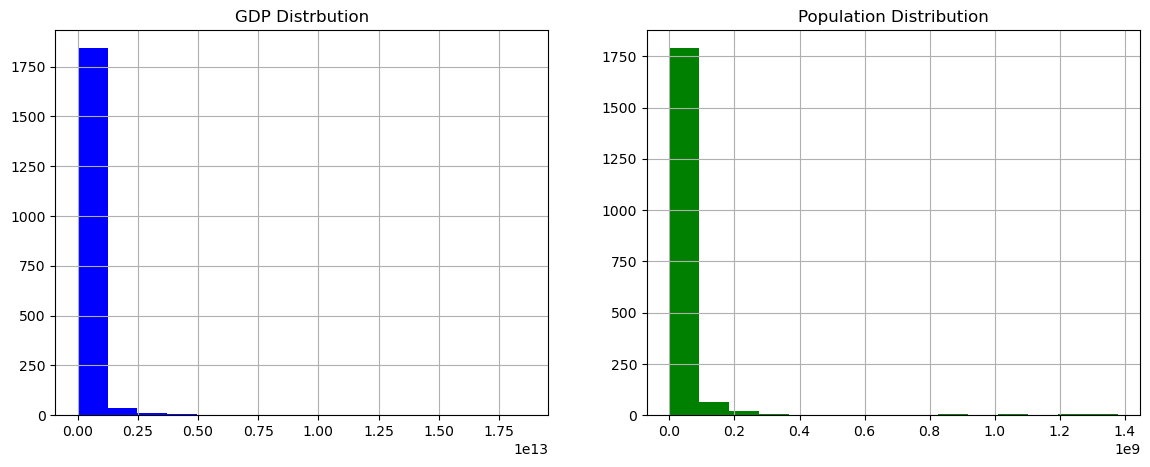

In [71]:
#plotting histogram -> distrbution of population and GDP

fig, (ax1, ax2) = subplots(nrows = 1,
                          ncols = 2,
                          figsize = (14,5))

linModelData['GDP'].hist(bins = 15, ax = ax1, color= 'blue')
ax1.set_title('GDP Distrbution')

linModelData['Population'].hist(bins = 15, ax = ax2, color= 'green')
ax2.set_title('Population Distribution')

The charts indicate that the distribution of these variables is highly skewed. To improve the suitability of the linear model, it would be beneficial to apply a logarithmic transformation to these variables.

In [72]:
import math

# computing log transforms for the variables
linModelData['Log_Population'] = np.log(linModelData['Population'])
linModelData['Log_GDP'] = np.log(linModelData['GDP'])

In [73]:
# regression model 2
y, X = dmatrices('Medal_Won_Corrected ~ Log_GDP + Log_Population + Total_Athletes + Home_adv + GDP_per_capita', 
                data = linModelData,
                return_type = 'dataframe')

#model summary -> log transforms of athelets with all possible attributes
model = sm.OLS(y, X)
result = model.fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Medal_Won_Corrected   R-squared:                       0.755
Model:                             OLS   Adj. R-squared:                  0.754
Method:                  Least Squares   F-statistic:                     1170.
Date:                 Sun, 23 Apr 2023   Prob (F-statistic):               0.00
Time:                         23:14:25   Log-Likelihood:                -6455.3
No. Observations:                 1907   AIC:                         1.292e+04
Df Residuals:                     1901   BIC:                         1.296e+04
Df Model:                            5                                         
Covariance Type:             nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         16.6564      2.214      7.525      0.000      12.315      20.998
Log_GDP           -1.1254      0.161     -7.009      0.000      -1.440      -0.811
Log_Population     0.3971      0.155      2.562      0.010       0.093       0.701
Total_Athletes     0.1462      0.002     58.549      0.000       0.141       0.151
Home_adv          -7.9921      2.180     -3.665      0.000     -12.269      -3.716
GDP_per_capita  1.344e-05   1.48e-05      0.907      0.365   -1.56e-05    4.25e-05
==============================================================================
Omnibus:                     1859.147   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           253485.577
Skew:                           4.229   Prob(JB):                         0.00
Kurtosis:                      58.845   Cond. No.                     2.64e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.64e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

-----
While an R^2 value of 0.75 is considered good, the more crucial factor is the level of error incurred while predicting a country's medal tally, which should be minimized. The summary report indicates the Root Mean Squared Error (RMSE) of the predictions, which is presented below.


In [74]:
# error associated with prediction
yPredicted = result.predict(X)
np.sqrt(metrics.mean_squared_error(y, yPredicted))

7.142700384582237

Based on the aforementioned outcome, it is apparent that knowing these predictors enables us to predict a country's medal tally with an error margin of merely ~7 medals. This outcome is indeed remarkable!

------

## Is it possible to predict athlete's sport solely based on their height and weight?

In [75]:
# checking all unique sports
olympicsCompleteSubset['Sport'].unique()

array(['Basketball', 'Judo', 'Badminton', 'Sailing', 'Athletics',
       'Handball', 'Weightlifting', 'Wrestling', 'Water Polo', 'Hockey',
       'Rowing', 'Swimming', 'Football', 'Equestrianism', 'Boxing',
       'Gymnastics', 'Taekwondo', 'Fencing', 'Diving', 'Canoeing',
       'Tennis', 'Shooting', 'Cycling', 'Softball', 'Archery',
       'Volleyball', 'Synchronized Swimming', 'Modern Pentathlon',
       'Table Tennis', 'Baseball', 'Rhythmic Gymnastics', 'Rugby Sevens',
       'Trampolining', 'Beach Volleyball', 'Triathlon', 'Golf'],
      dtype=object)

In [76]:
# extracting sports data -> height, weight statistics for females
baseDataFemale = olympicsCompleteSubset.loc[olympicsCompleteSubset['Sex'] == "F",
                                              ['Sport', 'Age','Weight', 'Height']].drop_duplicates()

------

### K-Nearest Neighbors (KNN) classification algorithm to predict accuracy

In [77]:
# creating y, X for K nearest neighbors problem
Y, X = dmatrices('Sport ~ 0 + Weight + Height',
                data = baseDataFemale,
                return_type = 'dataframe')


<br>
While plotting height and weight data for various sports, it is easy to differentiate athletes who participate in <b>athletics</b> and <b>weightlifting</b> because of their distinctive physical characteristics. 

<img src = 'images/weightlifter.png' width=500 >

However, distinguishing between athletes in other sports solely based on their height and weight can be challenging.

<br>


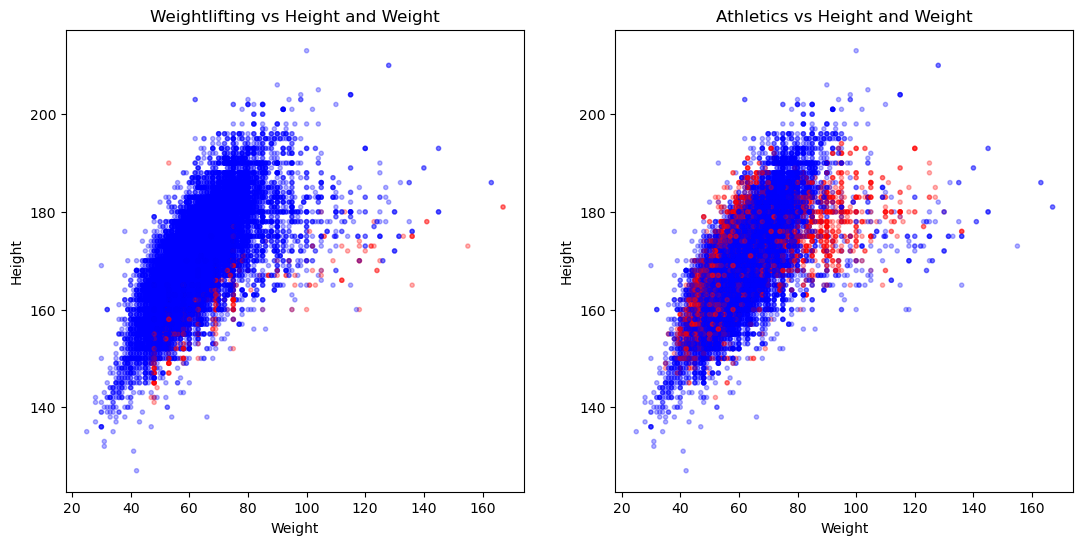

In [78]:
#plotting height & weight w.r.t sport-weightlifting
fig, (ax1, ax2) = subplots(nrows = 1, ncols = 2, figsize = (13,6))

ax1.scatter(X['Weight'], X['Height'], c = Y['Sport[Weightlifting]'], cmap = 'bwr', marker = '.', alpha = 0.3)
ax1.set_title('Weightlifting vs Height and Weight')
ax1.set_xlabel('Weight')
ax1.set_ylabel('Height')

ax2.scatter(X['Weight'], X['Height'], c = Y['Sport[Athletics]'], cmap = 'bwr', marker = '.', alpha = 0.3)
ax2.set_title('Athletics vs Height and Weight')
ax2.set_xlabel('Weight')
ax2.set_ylabel('Height')

show()

Lets see how accurate predictions we can make for weightlifting based on a person's height and weight!

In [79]:
# creating binary target variable for weightlifting
baseDataFemale['target'] = np.where(baseDataFemale['Sport'] == 'Weightlifting', 1, 0)

In [80]:
# KNN classification algorithm to predict weightlifting based on height & weight

from sklearn import model_selection
from sklearn import metrics
from sklearn import neighbors

# creating y & X matrices
Y, X = dmatrices('target ~ 0 + Weight + Height',
                data = baseDataFemale,
                return_type = 'dataframe')

# assigning target values
y = Y['target'].values

accuracies = []

# using 5-fold cross-validation to assess accuracy
kFold = model_selection.StratifiedKFold(n_splits = 5, shuffle = True).split(X, y)

model = neighbors.KNeighborsClassifier(n_neighbors = 20,
                                      p = 2,
                                      weights = 'uniform')

for train, holdout in kFold:
    model.fit(X.iloc[train], y[train])
    predictionOnTest = model.predict(X.iloc[holdout])
    accuracies.append(metrics.accuracy_score(y[holdout], predictionOnTest))

#predicting accuracy level
np.mean(accuracies)

0.9856441510072795

The accuracy rates indicate that we can make predictions about whether a person participates in weightlifting based on their height and weight with 98% accuracy. 

This high accuracy was due to the clear distinction of weightlifters on the scatterplot of weight and height. 

----
<br>
Now, the goal is to predict the involvement of individuals in athletics!

In [81]:
# KNN classification algorithm predicting Athletics from height and weight
baseDataFemale['target'] = np.where(baseDataFemale['Sport'] == 'Athletics', 1, 0)

from sklearn import model_selection
from sklearn import metrics
from sklearn import neighbors

# creating y & X matrices
Y, X = dmatrices('target ~ 0 + Weight + Height',
                data = baseDataFemale,
                return_type = 'dataframe')

# assigning target values
y = Y['target'].values

accuracies = []

# using 5-fold cross-validation to assess accuracy
kFold = model_selection.StratifiedKFold(n_splits = 5, shuffle = True).split(X, y)

model = neighbors.KNeighborsClassifier(n_neighbors = 20,
                                      p = 2,
                                      weights = 'uniform')

for train, holdout in kFold:
    model.fit(X.iloc[train], y[train])
    predictionOnTest = model.predict(X.iloc[holdout])
    accuracies.append(metrics.accuracy_score(y[holdout], predictionOnTest))

#predicting accuracy level
np.mean(accuracies)

0.8131708142881326

Impressively, when using the k-nearest neighbors method to predict participation in athletics, we achieve an accuracy rate of 81%.

------


# CONCLUSION:

1. USA, Russia, Germany, and China are the top medal-winning countries in the Olympics since 1964.
2. Women now have equal representation in Olympic teams.
3. The 1980 and 1984 Olympics were unusual due to the USA and Russia not participating in each other's games.
4. The top countries excel in different sporting events: USA in swimming, China in diving, Russia in wrestling, and all in athletics.
5. A nation's GDP has a positive impact on the number of medals they win.
6. 50% of the most accomplished athletes are American, mostly swimmers.
7. The medal tally of a country can be predicted with an error (RMSE) of ~7 medals using linear regression on GDP, population, GDP per capita, and team size.
8. An athlete's sports can be predicted based on height and weight using a K-Nearest Neighbors model, but it can be improved.

-----